# Fig9. Relative weight of each department in the nine main research centres. To favour comparison, each group of values is stacked at 100%. 

#### Import libraries

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import matplotlib as mpl


plt.style.use('seaborn-muted')


def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.fillna(0)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

In [27]:
data = read_csv(file_path)
data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
data = data[data["Organismo"] != 0]
# data = data[data["Financiación"] != 0]
mini = data[["ID proyecto","Organismo", "Área de procedencia/disciplina"]]
mini.columns = ["id", "organismo", "disciplina"]
mini = mini.drop_duplicates(subset ="id", keep = "first").reset_index(drop=True)
mini = mini.loc[mini["organismo"].str.contains('UNIVERSIDAD')]
# split disciplinary backgrounds in rows with ","
filtered_df = mini.loc[mini["disciplina"].str.contains(' | ')]
mini = mini.loc[mini["disciplina"].str.contains(' | ') != True]
new_discp = []
for row in filtered_df.itertuples():
    for disciplina in row.disciplina.split(" | "):
        new_discp.append([row.id, row.organismo, disciplina])
fix_df = pd.DataFrame(new_discp, columns=["id", "organismo", "disciplina"])
mini = mini.append(fix_df)
grp = mini.groupby(['organismo', 'disciplina'], sort=False).count()
grp = grp.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index()

top_centres = mini.groupby("organismo")["id"].count().reset_index().sort_values(by="id",ascending=False)
top_centres_list = top_centres["organismo"].to_list()

grp['org'] = pd.Categorical(
    grp['organismo'], 
    categories=top_centres_list, 
    ordered=True
)
grp.sort_values('org', inplace=True)
grp = grp.drop(['organismo'], axis=1)
grp = mini.groupby(['organismo', 'disciplina'], sort=False).count().apply(lambda x: x / float(x.sum()))
grp


,,id
organismo,disciplina,
UNIVERSIDAD COMPLUTENSE DE MADRID,Filología,0.051282
UNIVERSIDAD DE JAEN,Historia,0.003205
UNIVERSIDAD DE CORDOBA,Filología,0.028846
UNIVERSIDAD DE GRANADA,Sociología,0.016026
UNIVERSIDAD DE SALAMANCA,Filología,0.012821
...,...,...
UNIVERSIDAD DE GRANADA,Historia del Arte,0.003205
UNIVERSIDAD DE SEVILLA,Historia del Arte,0.006410
UNIVERSIDADE DE SANTIAGO DE COMPOSTELA,Ciencias de la computación,0.003205


In [ ]:
top_centres = mini.groupby("organismo")["id"].count().reset_index().sort_values(by="id",ascending=False)
top_centres_list = top_centres["organismo"].to_list()

# df_investigadores = grp.count().reset_index()
# df_investigadores.groupby("organismo")["disciplina"].apply("list")
# 
grp['org'] = pd.Categorical(
    grp['organismo'], 
    categories=top_centres_list, 
    ordered=True
)
grp.sort_values('org', inplace=True)
grp = grp.drop(['organismo'], axis=1)
grp = mini.groupby(['organismo', 'disciplina'], sort=False).count()
grp.unstack().reindex(top_centres_list)

#### Define function to clean projects data

In [59]:
def prepare_data(data, num_of_centres):
    data = read_csv(file_path)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    data = data[data["Organismo"] != 0]
    # data = data[data["Financiación"] != 0]
    mini = data[["ID proyecto","Organismo", "Área de procedencia/disciplina"]]
    mini.columns = ["id", "organismo", "disciplina"]
    mini = mini.drop_duplicates(subset ="id", keep = "first").reset_index(drop=True)
    mini = mini.loc[mini["organismo"].str.contains('UNIVERSIDAD')]
    # split disciplinary backgrounds in rows with ","
    filtered_df = mini.loc[mini["disciplina"].str.contains(' | ')]
    mini = mini.loc[mini["disciplina"].str.contains(' | ') != True]
    new_discp = []
    for row in filtered_df.itertuples():
        for disciplina in row.disciplina.split(" | "):
            new_discp.append([row.id, row.organismo, disciplina])
    fix_df = pd.DataFrame(new_discp, columns=["id", "organismo", "disciplina"])
    mini = mini.append(fix_df)
    grp = mini.groupby(['organismo', 'disciplina'], sort=False).count().reset_index()
    # grp = grp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

    top_centres = mini.groupby("organismo")["id"].count().reset_index().sort_values(by="id",ascending=False)
    top_centres_list = top_centres["organismo"].to_list()

    # df_investigadores = grp.count().reset_index()
    # df_investigadores.groupby("organismo")["disciplina"].apply("list")
    grp['org'] = pd.Categorical(
        grp['organismo'], 
        categories=top_centres_list, 
        ordered=True
    )
    grp.sort_values('org', inplace=True)
    grp = grp.drop(['organismo'], axis=1)
    grp = mini.groupby(['organismo', 'disciplina'], sort=False).count().apply(lambda x: x / float(x.sum()))
    result = grp.unstack().reindex(top_centres_list).head(num_of_centres)
    return result

#### Run program
## Change 'num_of_centres' to show as many centres as you want'

In [60]:
num_of_centres = 10
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos, num_of_centres)

In [61]:
df2

id                       \
disciplina                                    Filología  Historia Sociología   
organismo                                                                      
UNIVERSIDAD DE BARCELONA                       0.022436  0.022436   0.003205   
UNIVERSIDAD COMPLUTENSE DE MADRID              0.051282  0.012821        NaN   
UNIVERSIDADE DE SANTIAGO DE COMPOSTELA         0.054487  0.009615        NaN   
UNIVERSIDAD DE GRANADA                         0.012821  0.012821   0.016026   
UNIVERSIDADE DA CORUÑA                         0.041667       NaN        NaN   
UNIVERSIDAD AUTONOMA DE BARCELONA              0.025641  0.012821        NaN   
UNIVERSIDAD NACIONAL DE EDUCACION A DISTANCIA  0.035256       NaN        NaN   
UNIVERSIDAD DE ALICANTE                        0.012821  0.009615        NaN   
UNIVERSIDAD DE SEVILLA                         0.006410  0.012821        NaN   
UNIVERSIDAD DE SALAMANCA                       0.012821  0.009615        NaN   

                                                                               \
disciplina                                    Geografía Arqueología Filosofía   
organismo                                                                       
UNIVERSIDAD DE BARCELONA                       0.006410    0.003205       NaN   
UNIVERSIDAD COMPLUTENSE DE MADRID                   NaN    0.003205   0.00641   
UNIVERSIDADE DE SANTIAGO DE COMPOSTELA              NaN         NaN       NaN   
UNIVERSIDAD DE GRANADA                         0.003205    0.006410       NaN   
UNIVERSIDADE DA CORUÑA                              NaN         NaN       NaN   
UNIVERSIDAD AUTONOMA DE BARCELONA              0.003205         NaN       NaN   
UNIVERSIDAD NACIONAL DE EDUCACION A DISTANCIA       NaN         NaN       NaN   
UNIVERSIDAD DE ALICANTE                             NaN         NaN       NaN   
UNIVERSIDAD DE SEVILLA                              NaN    0.006410       NaN   
UNIVERSIDAD DE SALAMANCA                            NaN         NaN       NaN   

                                                                     \
disciplina                                    Lingüística y lenguas   
organismo                                                             
UNIVERSIDAD DE BARCELONA                                   0.003205   
UNIVERSIDAD COMPLUTENSE DE MADRID                               NaN   
UNIVERSIDADE DE SANTIAGO DE COMPOSTELA                     0.012821   
UNIVERSIDAD DE GRANADA                                     0.003205   
UNIVERSIDADE DA CORUÑA                                          NaN   
UNIVERSIDAD AUTONOMA DE BARCELONA                          0.006410   
UNIVERSIDAD NACIONAL DE EDUCACION A DISTANCIA                   NaN   
UNIVERSIDAD DE ALICANTE                                    0.003205   
UNIVERSIDAD DE SEVILLA                                          NaN   
UNIVERSIDAD DE SALAMANCA                                        NaN   

                                                                 \
disciplina                                    Historia del Arte   
organismo                                                         
UNIVERSIDAD DE BARCELONA                               0.019231   
UNIVERSIDAD COMPLUTENSE DE MADRID                      0.016026   
UNIVERSIDADE DE SANTIAGO DE COMPOSTELA                      NaN   
UNIVERSIDAD DE GRANADA                                 0.003205   
UNIVERSIDADE DA CORUÑA                                      NaN   
UNIVERSIDAD AUTONOMA DE BARCELONA                           NaN   
UNIVERSIDAD NACIONAL DE EDUCACION A DISTANCIA          0.006410   
UNIVERSIDAD DE ALICANTE                                0.003205   
UNIVERSIDAD DE SEVILLA                                 0.006410   
UNIVERSIDAD DE SALAMANCA                                    NaN   

                                                              \
disciplina                                    Artes visuales   
organismo                         

#### Print graph

<Figure size 432x288 with 0 Axes>

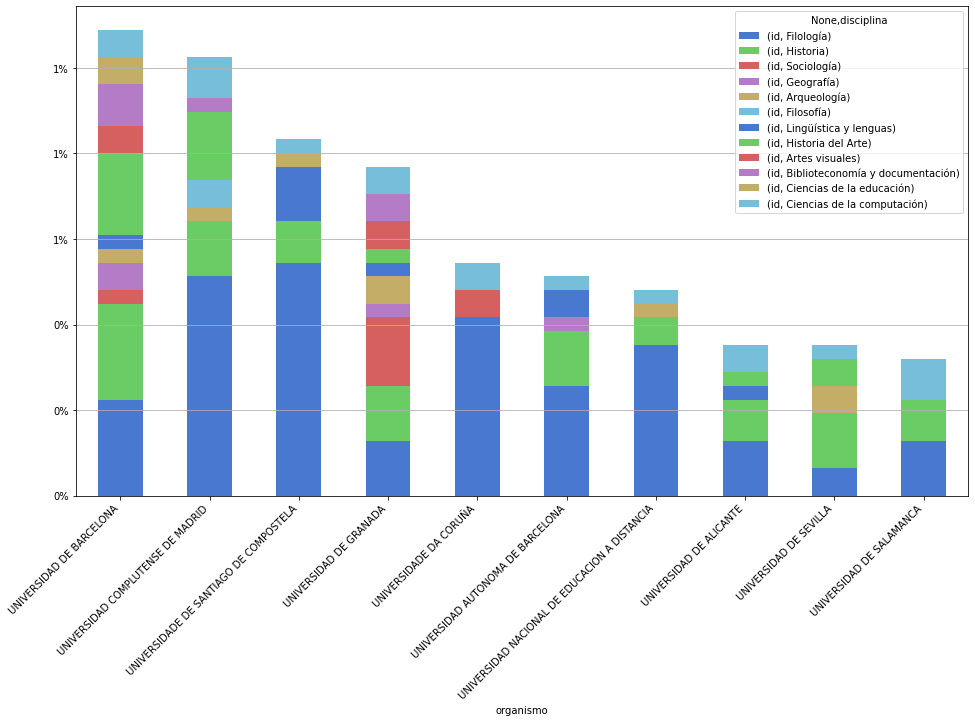

In [62]:
plt.figure()
ax1 = df2.plot(stacked=True, kind="bar", figsize=(16,9), legend=True)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(10,decimals=0))
plt.grid(axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()